In [2]:
import pandas as pds
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import f

In [ ]:
#EXERCICE 1 :

In [3]:
obs = np.array([[592, 119, 849, 504, 36],
[544, 97, 677, 451, 14]])
print(obs)

[[592 119 849 504  36]
 [544  97 677 451  14]]


In [16]:
chi2, p, dof, thq = stats.chi2_contingency(obs, correction=False)
print(thq)

[[614.37033222 116.81689415 825.28972444 516.48210147  27.04094772]
 [521.62966778  99.18310585 700.71027556 438.51789853  22.95905228]]


In [15]:
print('La statistique de décision vaut',chi2,'. Sous H0 elle suit une loi du Chi2 à',dof, 'degrés de liberté. Ainsi la p-value est égale à', p)

La statistique de décision vaut 10.467448536455917 . Sous H0 elle suit une loi du Chi2 à 4 degrés de liberté. Ainsi la p-value est égale à 0.03324834398196967


In [ ]:
#EXERCICE 2 :

In [5]:
man = pds.read_csv( "man.csv" , sep = ";", decimal = "," )
print(man)

    Manele  Manala
0   110.40  116.98
1   116.36  121.31
2   117.95  131.22
3   101.85  113.17
4   111.10  105.62
5   110.72  113.54
6   124.27   94.41
7   112.94  120.90
8   115.86  117.82
9   118.95  110.98
10  107.33  113.51
11  110.98  108.42
12  108.64  126.06
13  121.46  111.45
14  100.03  105.55
15  110.32  113.68
16  113.88  104.18
17  118.02  123.08
18  107.50  105.58
19  103.19  108.62
20  102.06  108.17
21  112.17  106.76
22  107.88  109.57
23  109.60  106.69
24  105.53     NaN
25  104.85     NaN
26   96.62     NaN


In [12]:
man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Manele  27 non-null     float64
 1   Manala  24 non-null     float64
dtypes: float64(2)
memory usage: 564.0 bytes


In [6]:
manele = man["Manele"]
manala = man["Manala"].dropna()

In [47]:
stats.describe(manele)

DescribeResult(nobs=27, minmax=(np.float64(96.62), np.float64(124.27)), mean=np.float64(110.38740740740741), variance=np.float64(44.82071994301993), skewness=np.float64(0.0429306467729167), kurtosis=np.float64(-0.4446029513183656))

In [11]:
stats.tstd(manele)

np.float64(6.694827850140729)

In [10]:
np.percentile(manele, [25, 50, 75])

array([106.43, 110.4 , 114.87])

In [48]:
stats.describe(manala)

DescribeResult(nobs=24, minmax=(np.float64(94.41), np.float64(131.22)), mean=np.float64(112.38625), variance=np.float64(65.89455489130434), skewness=np.float64(0.3458209247607714), kurtosis=np.float64(0.18728434878658273))

In [12]:
stats.tstd(manala)

np.float64(8.1175461126688)

In [15]:
np.percentile(manala, [25, 50, 75])

array([106.7425, 111.215 , 117.19  ])

In [19]:
stats.shapiro(manele)

ShapiroResult(statistic=np.float64(0.9911309616788551), pvalue=np.float64(0.9971215201499927))

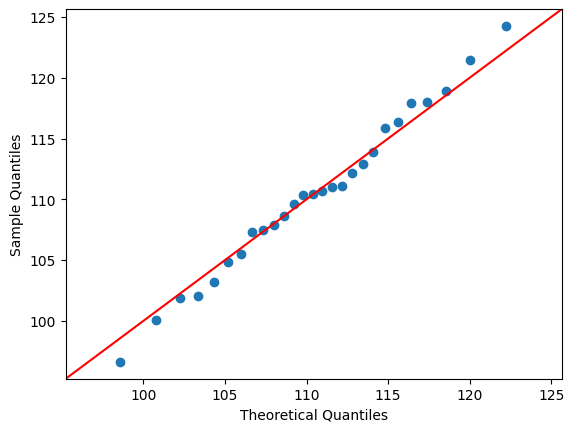

In [87]:
sm.qqplot(manele,loc=np.mean(manele) ,scale=np.std(manele), line='45')
plt.show()

In [31]:
stats.shapiro(manala)

ShapiroResult(statistic=np.float64(0.9629412083389558), pvalue=np.float64(0.5003015467074076))

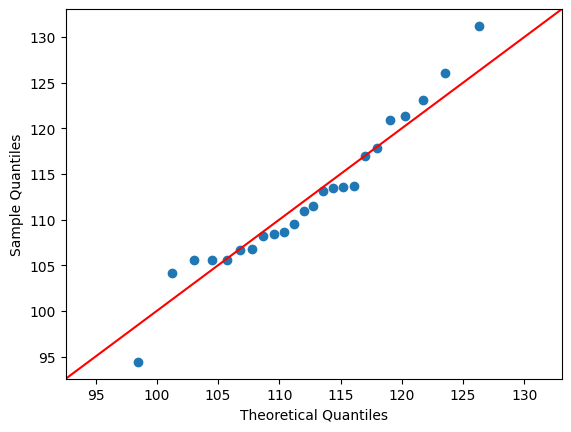

In [88]:
sm.qqplot(manala,loc=np.mean(manala) ,scale=np.std(manala), line='45')
plt.show()

In [43]:
def f_test(x, y) :
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calcul stat d´ecision
    dfn = x.size-1 # ddl du num´erateur
    dfd = y.size-1 # ddl du d´enominateur
    p = 1-stats.f.cdf(f, dfn, dfd) # calcul p-value
    return f, p, dfn, dfd

In [44]:
f,p,dfn,dfd=f_test(manele,manala)
print("La statistique de décision vaut", f,". Sous H0, elle suit une loi de Fisher à ", dfn, "et",dfd, "ddl. La p-value est égale à",p)

La statistique de décision vaut 0.6801885226625094 . Sous H0, elle suit une loi de Fisher à  26 et 23 ddl. La p-value est égale à 0.829307647608173


In [45]:
t,p=stats.ttest_ind(manele,manala)

In [46]:
print("La statistique de décision vaut", t,". Sous H0, elle suit une loi de Student à ", len(manele)+len(manala)-2,". La p-value est égale à",p)

La statistique de décision vaut -0.9632469680891367 . Sous H0, elle suit une loi de Student à  49 . La p-value est égale à 0.34015339113128873


In [ ]:
#EXERCICE 3 :

In [16]:
timbres = pds.read_csv( "timbres.csv" , sep = ";", decimal = "," )
print(timbres)

    Unnamed: 0  epaisseur      pays
0            1        263  Belgique
1            2        259  Belgique
2            3        246  Belgique
3            4        255  Belgique
4            5        260  Belgique
..         ...        ...       ...
84          85        197    France
85          86        213    France
86          87        212    France
87          88        216    France
88          89        215    France

[89 rows x 3 columns]


In [17]:
Allemagne = timbres["epaisseur"][timbres["pays"]=="Allemagne"].dropna()
Autriche = timbres["epaisseur"][timbres["pays"]=="Autriche"].dropna()
Belgique = timbres["epaisseur"][timbres["pays"]=="Belgique"].dropna()
France = timbres["epaisseur"][timbres["pays"]=="France"].dropna()
print(Allemagne, Autriche, Belgique, France)

23    246
24    255
25    249
26    247
27    246
28    257
29    256
30    256
31    252
32    261
33    250
34    246
35    254
36    261
37    253
38    245
39    251
40    258
41    238
Name: epaisseur, dtype: int64 42    254
43    245
44    246
45    256
46    242
47    265
48    244
49    258
50    250
51    250
52    259
53    259
54    253
55    258
56    248
57    242
58    250
59    258
60    244
61    252
62    256
63    245
64    258
65    250
66    254
Name: epaisseur, dtype: int64 0     263
1     259
2     246
3     255
4     260
5     258
6     254
7     247
8     254
9     255
10    258
11    253
12    248
13    262
14    255
15    257
16    244
17    237
18    250
19    250
20    247
21    247
22    265
Name: epaisseur, dtype: int64 67    211
68    218
69    230
70    210
71    201
72    219
73    221
74    220
75    196
76    203
77    211
78    199
79    206
80    216
81    205
82    209
83    209
84    197
85    213
86    212
87    216
88    215
Name: epaisseur, dty

In [18]:
stats.describe(Allemagne)

DescribeResult(nobs=19, minmax=(np.int64(238), np.int64(261)), mean=np.float64(251.6315789473684), variance=np.float64(36.578947368421055), skewness=np.float64(-0.31071599868696925), kurtosis=np.float64(-0.42427667458359686))

In [19]:
stats.tstd(Allemagne)

np.float64(6.048053188292994)

In [20]:
np.percentile(Allemagne, [25, 50, 75])

array([246.5, 252. , 256. ])

In [75]:
stats.describe(Autriche)

DescribeResult(nobs=25, minmax=(np.int64(242), np.int64(265)), mean=np.float64(251.84), variance=np.float64(39.39000000000001), skewness=np.float64(0.05571239963690025), kurtosis=np.float64(-0.9365670792868732))

In [23]:
stats.tstd(Autriche)

np.float64(6.276145313805283)

In [26]:
np.percentile(Autriche, [25, 50, 75])

array([246., 252., 258.])

In [76]:
stats.describe(Belgique)

DescribeResult(nobs=23, minmax=(np.int64(237), np.int64(265)), mean=np.float64(253.2173913043478), variance=np.float64(46.63241106719368), skewness=np.float64(-0.33689318625492265), kurtosis=np.float64(-0.30250847594104346))

In [22]:
stats.tstd(Belgique)

np.float64(6.828792797207547)

In [24]:
np.percentile(Belgique, [25, 50, 75])

array([247.5, 254. , 258. ])

In [77]:
stats.describe(France)

DescribeResult(nobs=22, minmax=(np.int64(196), np.int64(230)), mean=np.float64(210.77272727272728), variance=np.float64(72.56493506493506), skewness=np.float64(0.08580712110327479), kurtosis=np.float64(-0.3354933187861082))

In [21]:
stats.tstd(France)

np.float64(8.518505447843246)

In [25]:
np.percentile(France, [25, 50, 75])

array([205.25, 211.  , 216.  ])

In [78]:
stats.shapiro(Allemagne)

ShapiroResult(statistic=np.float64(0.9658387921312277), pvalue=np.float64(0.6912453962181222))

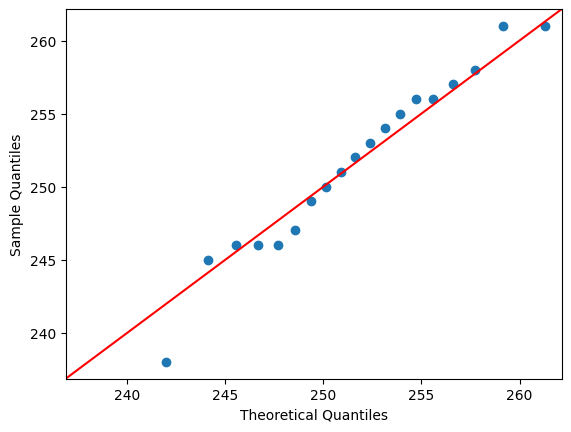

In [89]:
sm.qqplot(Allemagne,loc=np.mean(Allemagne) ,scale=np.std(Allemagne), line='45')
plt.show()

In [79]:
stats.shapiro(Autriche)

ShapiroResult(statistic=np.float64(0.9515972835214007), pvalue=np.float64(0.2723113861861385))

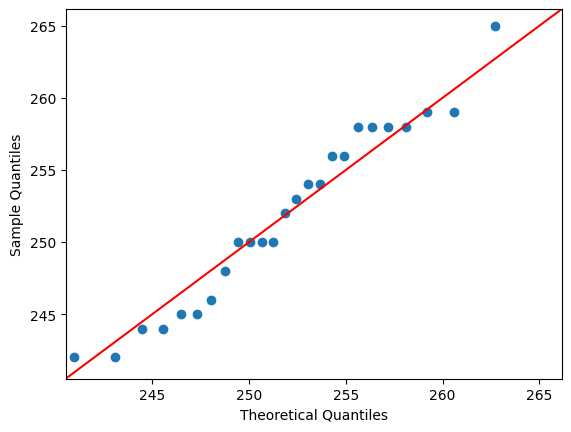

In [90]:
sm.qqplot(Autriche,loc=np.mean(Autriche) ,scale=np.std(Autriche), line='45')
plt.show()

In [80]:
stats.shapiro(Belgique)

ShapiroResult(statistic=np.float64(0.9751114742862492), pvalue=np.float64(0.8086314188071548))

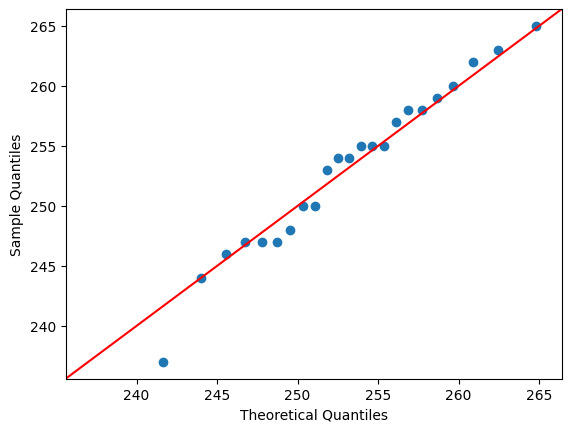

In [91]:
sm.qqplot(Belgique,loc=np.mean(Belgique) ,scale=np.std(Belgique), line='45')
plt.show()

In [81]:
stats.shapiro(France)

ShapiroResult(statistic=np.float64(0.9797892030679134), pvalue=np.float64(0.9126663571980171))

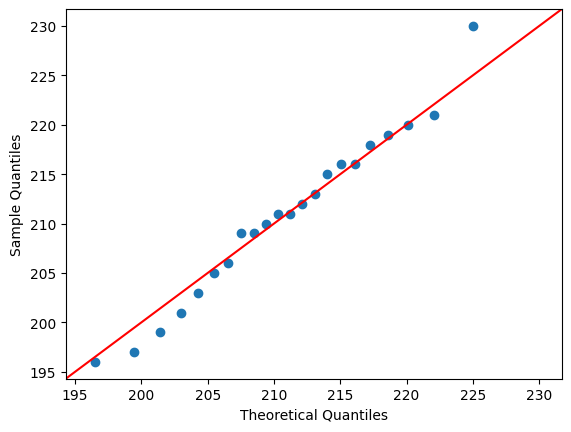

In [92]:
sm.qqplot(France,loc=np.mean(France) ,scale=np.std(France), line='45')
plt.show()

In [83]:
B,p=stats.bartlett(Allemagne,Autriche,Belgique,France)
print("La statistique de décision est égale à", B,". La p-value est",p )

La statistique de décision est égale à 5.525752989353395 . La p-value est 0.1371063916973415


In [82]:
model = ols('epaisseur ~ pays', data=timbres).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
pays,28530.442268,3.0,194.619308,5.824759e-38
Residual,4153.557732,85.0,NaN,NaN


In [69]:
stats.shapiro(model.resid)

ShapiroResult(statistic=np.float64(0.989752239477237), pvalue=np.float64(0.7196596004661687))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   0.2084 0.9997   -5.367   5.7839  False
     0      2   1.5858 0.8841  -4.0933    7.265  False
     0      3 -40.8589    0.0 -46.5961 -35.1216   True
     1      2   1.3774 0.9037  -3.9154   6.6702  False
     1      3 -41.0673    0.0 -46.4224 -35.7122   True
     2      3 -42.4447    0.0 -47.9077 -36.9817   True
------------------------------------------------------


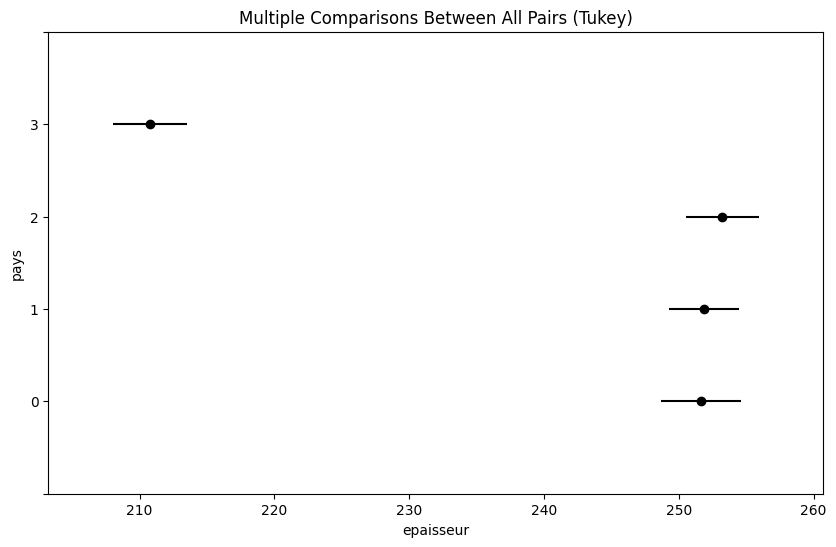

In [95]:
test = timbres.filter(items=["pays", "epaisseur"]).dropna()
test["pays_code"] = pds.Categorical(test["pays"]).codes
comp = mc.MultiComparison(test["epaisseur"], test["pays_code"])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res)

post_hoc_res.plot_simultaneous(ylabel="pays", xlabel="epaisseur")
plt.show()

In [98]:
test = timbres.filter(items=["pays", "epaisseur"]).dropna()
comp = mc.MultiComparison(test["epaisseur"], test["pays"])
tbl, a, b = comp.allpairtest(stats.ttest_ind, method="bonf")
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
  group1   group2    stat   pval  pval_corr reject
--------------------------------------------------
Allemagne Autriche -0.1108 0.9123       1.0  False
Allemagne Belgique -0.7883 0.4352       1.0  False
Allemagne   France 17.4405    0.0       0.0   True
 Autriche Belgique -0.7282 0.4702       1.0  False
 Autriche   France 18.9651    0.0       0.0   True
 Belgique   France 18.4831    0.0       0.0   True
--------------------------------------------------
